<a href="https://colab.research.google.com/github/jfdoppler/DNL-1c2020/blob/master/DNL_1C2020_Analisis_de_se%C3%B1ales_temporales_Extras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de señales temporales: extras

**Oscilador de Duffing**

Para el oscilador de Duffing:

$\ddot{x}+\delta y + \alpha x + \beta x^{3} = \gamma cos(\omega t)$

con $\alpha=-1 ; \beta = 1; \delta=0.1; \gamma=0.35; \omega = 1.4$:

**(a)** Escriba el oscilador como un sistema dinámico autónomo haciendo el reemplazo $\theta=\omega t$. Integre el sistema y observe $x(t)$ y $\dot{x}(t)$, y la trayectoria en el espacio de fases.

**(b)** Arme la sección de Poincarè correspondiente a mirar el sistema cada un período del forzante. 

*Ayuda: use como paso de integración una fracción del período del forzante.*

**(c)** Haga un embedding de x. ¿Qué dimensión tiene que elegir? Arme nuevamente la sección de Poincarè para la reconstrucción del espacio de fases. Compare con (b). 


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

global alfa
global beta
global delta
global gamma
global w

def duffing(v, t):
    x, y, tita = v[0],v[1],v[2]
    
    dx = y
    dy = - delta * y - alfa * x - beta * x**3 + gamma * np.cos(tita)
    dtita = w
    
    return [dx, dy, dtita]

alfa = -1
beta = 1
delta = 0.1
gamma = 0.35
w = 1.4
T = 2*np.pi / w


dt = 0.04487989505128276

tiempo = np.arange(0,15000 * T,dt)
v0 = [1,1,0]
sol = odeint(duffing,v0,tiempo)
x, y, tita = sol[:,0], sol[:,1], sol[:,2]

Text(0.5, 0, 't')

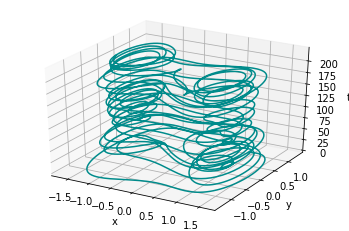

In [3]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x[0:5000], y[0:5000],tita[0:5000] / w, 'darkcyan')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('t')

4.487989505128276


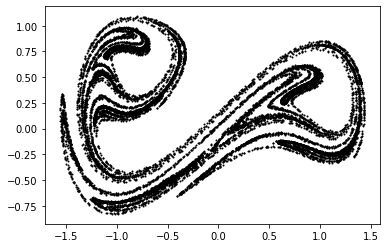

In [4]:
x_plano = []
y_plano = []

T = 2*np.pi / w
#Quiero mirar cada un periodo del forzante
print(T)
x_plano = x[int(200 * T/dt):len(x):int(T/dt)]
y_plano = y[int(200 * T/dt):len(y):int(T/dt)]

plt.scatter(x_plano, y_plano, facecolor='k', s=1, alpha=1)

Ahora hacemos la seccion con el embedding.

4.487989505128276


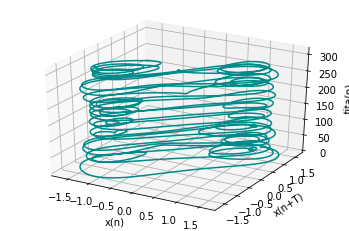

In [5]:
#%% Mapa con el embedding
x_emb = []
y_emb = []
tita_emb = []
tau = int(T/(dt*6))

for k in range(len(x)-tau):
    x_emb.append(x[k])
    y_emb.append(x[k+tau])
    tita_emb.append(tita[k])
    
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x_emb[0:5000], y_emb[0:5000],tita_emb[0:5000], 'darkcyan')
ax.set_xlabel('x(n)')
ax.set_ylabel('x(n+T)')
ax.set_zlabel('tita(n)')

    
T = 2*np.pi / w
#Quiero mirar cada un periodo del forzante
print(T)
x_plano_emb = x_emb[int(200 * T/dt):len(x_emb):int(T/dt)]
y_plano_emb = y_emb[int(200 * T/dt):len(y_emb):int(T/dt)]

Text(0, 0.5, '$x(n+\\tau)$')

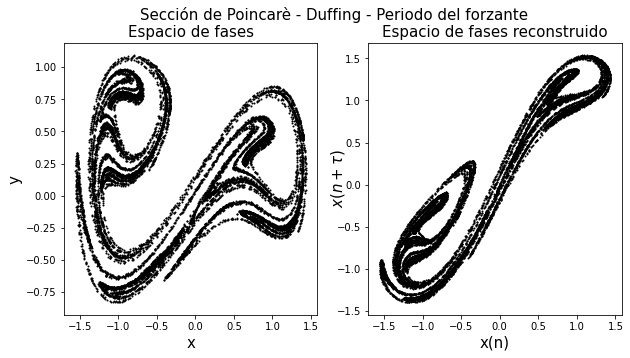

In [6]:
plt.figure(figsize=(10,5))
plt.suptitle("Sección de Poincarè - Duffing - Periodo del forzante", fontsize=15)

plt.subplot(121)
plt.title("Espacio de fases", fontsize=15)
plt.scatter(x_plano, y_plano, facecolor='k', s=1, alpha=1)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.subplot(122)
plt.title("Espacio de fases reconstruido", fontsize=15)
plt.scatter(x_plano_emb, y_plano_emb, facecolor='k', s=1, alpha=1)  
plt.xlabel("x(n)", fontsize=15)
plt.ylabel(r"$x(n+\tau)$", fontsize=15, labelpad=-10)  

**Falsos primeros vecinos**

**Ejercicio:**Para el atractor de Lorenz:

$\frac{dx}{dt}=-y^{2}-z^{2}-a(x-F)$

$\frac{dy}{dt}=xy-bxz-y+G$

$\frac{dz}{dt}=bxy+xz-z$

Con a=0.25, b=4, F=8, G=1. Usando el criterio de falsos vecinos, determine la mínima dimensión necesaria para reconstruir el espacio de fases a partir de $x(t)$. 

*Ayuda: use dt=0.05; 6000 puntos; retraso de embedding T=11, y distancia de umbral Rt=10.*

Text(0.5, 0, 'z')

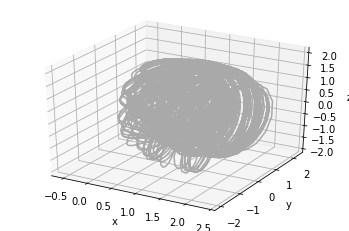

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

global a
global b
global F
global G

def lorenz(v, t):
    x, y, z = v[0], v[1], v[2]
    
    dxdt = -y**2 - z**2 - a * (x - F)
    dydt = x * y - b * x * z - y + G
    dzdt = b * x * y + x * z - z
    
    return [dxdt, dydt, dzdt]

a, b, F, G = 0.25, 4.0, 8.0, 1.0

dt = 0.05 #Del paper
data_points = 6000 #Del paper
T = 11 #Del paper

tiempo = np.arange(0,int(data_points*dt),dt)
v0 = [1,1,1]
sol = odeint(lorenz,v0,tiempo)
x, y, z = sol[:,0], sol[:,1], sol[:,2]

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'darkgray', alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0, 0.5, 'x')

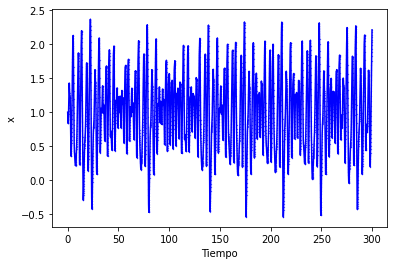

In [ ]:
plt.figure()
plt.plot(tiempo, x, 'b.-', markersize=0.5)
plt.xlabel("Tiempo")
plt.ylabel("x")

In [ ]:
def vecinos(y, dim):
    #y contiene los puntos del embedding [[P1], [P2], [P3],...,[PN]]
    #dim = la dimension del embedding
    #Definimos el numero de puntos
    N = len(y)
    #Transformamos el vector y en un array
    y = np.array(y)
    #Inicializamos la matriz de distancia cuadrática entre puntos i j
    Dij = []
    #Calculamos las distancias
    for k in range(len(y)-1):
        #Armamos una matriz de "N-k-1" filas y "dim" columnas en las que se
        #repite el punto Pk al que le vamos a calcular la distancia con el resto
        My = np.full((N-k-1, dim), y[k])
        if dim ==1:
            #Si la dimension es 1, la distancia es restar (Pk - Pj)^2
            Dktodos = np.power((My.transpose() - y[k+1:])[0], 2, dtype=float)
        else:
            #Si la dimension es >1, la distancia es ((xk-xj)^2+(yk-yj)^2+...)
            #por eso hacemos la resta de componentes, elevamos al cuadrado
            #y despues sumamos
            Dktodos = np.sum(np.power(My-y[k+1:],2, dtype=float), 1, dtype=float)
        #La fila de la matriz va a ser ceros hasta el lugar k y despues empiezan
        #las distancias que calculamos
        fila = list(np.concatenate((np.zeros(k+1), Dktodos)))
        Dij.append(fila)
        #print("Porcentaje :", 100*k/N)
    #Al ultimo punto no hace falta calcularle las distancias. Agregamos una fila
    #de ceros
    Dij.append(list(np.zeros(N)))
    Dij = np.array(Dij)
    #Hasta aca tenemos una matriz triangular superior, con ceros en la diagonal
    #La matriz debe ser simetrica. Y para que al buscar la minima distancia
    #no nos agarre el punto consigmo mismo; le sumamos algo grande a la diagonal    
    Dij = Dij + Dij.transpose() + np.eye(N) *100
    #Ya teniendo la matriz de distancias cuadraticas, buscamos los indices
    #en los que esta el minimo de cada fila
    indice_min = np.argmin(Dij, 1)
    #Teniendo los indices, guardamos la minima distancia
    dist_min = []
    for k in range(N):
        dist_min.append(np.sqrt(Dij[k][indice_min[k]]))
    #Por utlimo, devolvemos los indices de minimo y el valor de la distancia
    return indice_min, dist_min
porcentaje_falsos_vecinos = []


Dimension 1

In [ ]:
dim = 1
indice_min, dist_min = vecinos(x, dim)
#%%
#Determino cuales son falsos vecinos para 1d
R_crecimiento = []
falsos_vecinos = 0
puntos_noanalizados = 0
for k in range(len(indice_min)-T):
    if indice_min[k]+dim*T < len(x):
        R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
        R_crecimiento.append(R_aux)
        if R_aux >= 10:
            falsos_vecinos+=1
    else:
        puntos_noanalizados+=1
print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
print(puntos_noanalizados)
porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

El porcentaje de falsos vecinos es: 0.9944898981466022
7


Dim 2


In [ ]:
y_emb_2 = []

for k in range(len(x)-1*T):
    y_emb_2.append([x[k], x[k+T]])

dim = 2
indice_min, dist_min = vecinos(y_emb_2, dim)
#%%
#Determino cuales son falsos vecinos para 1d
R_crecimiento = []
falsos_vecinos = 0
puntos_noanalizados = 0
for k in range(len(indice_min)-T):
    if indice_min[k]+dim*T < len(x):
        R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
        R_crecimiento.append(R_aux)
        if R_aux >= 10:
            falsos_vecinos+=1
    else:
        puntos_noanalizados+=1
print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
print(puntos_noanalizados)
porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

El porcentaje de falsos vecinos es: 0.46585406578727667
5


Dim 3

In [ ]:
y_emb_3 = []

for k in range(len(x)-2*T):
    y_emb_3.append([x[k], x[k+T], x[k+2*T]])

dim = 3
indice_min, dist_min = vecinos(y_emb_3, dim)
#%%
#Determino cuales son falsos vecinos para 1d
R_crecimiento = []
falsos_vecinos = 0
puntos_noanalizados = 0
for k in range(len(indice_min)-T):
    if indice_min[k]+dim*T < len(x):
        R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
        R_crecimiento.append(R_aux)
        if R_aux >= 10:
            falsos_vecinos+=1
    else:
        puntos_noanalizados+=1
print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
print(puntos_noanalizados)
porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

El porcentaje de falsos vecinos es: 0.05960928368675906
3


Dim 4

In [ ]:
y_emb_4 = []

for k in range(len(x)-3*T):
    y_emb_4.append([x[k], x[k+T], x[k+2*T], x[k+3*T]])

dim = 4
indice_min, dist_min = vecinos(y_emb_4, dim)
#%%
#Determino cuales son falsos vecinos para 1d
R_crecimiento = []
falsos_vecinos = 0
puntos_noanalizados = 0
for k in range(len(indice_min)-T):
    if indice_min[k]+dim*T < len(x):
        R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
        R_crecimiento.append(R_aux)
        if R_aux >= 10:
            falsos_vecinos+=1
    else:
        puntos_noanalizados+=1
print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
print(puntos_noanalizados)
porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

El porcentaje de falsos vecinos es: 0.007012856904324595
11


Dim 5

In [ ]:
y_emb_5 = []

for k in range(len(x)-4*T):
    y_emb_5.append([x[k], x[k+T], x[k+2*T], x[k+3*T], x[k+4*T]])

dim = 5
indice_min, dist_min = vecinos(y_emb_5, dim)
#%%
#Determino cuales son falsos vecinos para 1d
R_crecimiento = []
falsos_vecinos = 0
puntos_noanalizados = 0
for k in range(len(indice_min)-T):
    if indice_min[k]+dim*T < len(x):
        R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
        R_crecimiento.append(R_aux)
        if R_aux >= 10:
            falsos_vecinos+=1
    else:
        puntos_noanalizados+=1
print("El porcentaje de falsos vecinos es:", falsos_vecinos / (len(x)-T))
print(puntos_noanalizados)
porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

El porcentaje de falsos vecinos es: 0.0011688094840540991
21


Graficamos los resultados

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

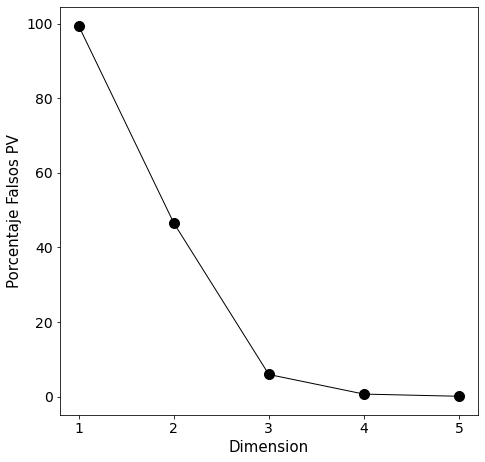

In [ ]:
plt.figure(figsize=(7.5,7.5))
plt.plot(np.arange(1,6), np.array(porcentaje_falsos_vecinos)*100, '.-', color='k', lw=1, markersize=20)
plt.xlabel("Dimension", fontsize=15)
plt.xticks(np.arange(1,6), fontsize=14)
plt.ylabel("Porcentaje Falsos PV", fontsize=15)
plt.yticks(fontsize=14)